# Adam Goebel

## Is there a fund sector that provides better returns or, does higher fund sector differetiation lead to better returns?
For my research I will examine if having diversity in fund sector investment is correlated with a higher rate of return. I will also examine if investment in a specific sector correlates with increased return at various points in time. I will do this by utilising the data provided on fund sector investment to determine if that fund has high, equal, or low fund sector diversity. I will then compare this information to the data provided on the rate of return for each fund.

## Data Analysis Plan
for my data analysis plan i will take the mean value of each fund sector and compare it to fund returns at year to date, one month, three months, one year, three years, five years, and ten years. From there i will take tghe standard deviation of the fund sector investment of each fund and compare it to fund returns at the previous listed time periods. I will also examine the count of fund sector investment and compare it to the previously listed time periods. This analysis should give me a firm understanding of my research question.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/raw/MutualFunds.csv')
df.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(23783, 298)

In [ ]:
df.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'initial_investment',
       'subsequent_investment', 'fund_category', 'fund_family',
       ...
       'peer_environment_avg', 'peer_environment_max', 'social_score',
       'peer_social_min', 'peer_social_avg', 'peer_social_max',
       'governance_score', 'peer_governance_min', 'peer_governance_avg',
       'peer_governance_max'],
      dtype='object', length=298)

In [ ]:
df1 = df[['fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities'
 ]]

In [ ]:
df1.head()

,fund_sector_basic_materials,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities
0,0.1607,0.0088,0.0190,0.0293,0.1852,0.0000,0.0000,0.1413,0.3520,0.0012,0.1025
1,0.0368,0.0000,0.0034,0.0000,0.0000,0.0000,0.9598,0.0000,0.0000,0.0000,0.0000
2,0.0290,0.0720,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,0.0376,0.1696,0.0258
3,0.0000,0.1617,0.1957,0.0046,0.0000,0.1458,0.1326,0.0346,0.0000,0.3250,0.0000
4,0.0290,0.0720,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,0.0376,0.1696,0.0258


In [ ]:
df1.describe()

,fund_sector_basic_materials,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities
count,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000,18267.000000
mean,0.049031,0.079892,0.113028,0.059458,0.065239,0.146689,0.114826,0.111368,0.058090,0.167099,0.035280
std,0.086885,0.080717,0.081611,0.066826,0.168345,0.122289,0.101626,0.083963,0.152007,0.111661,0.100849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015500,0.031900,0.076000,0.027200,0.004000,0.088400,0.067350,0.068600,0.005400,0.096700,0.000000
50%,0.040300,0.078500,0.118100,0.056900,0.028000,0.147700,0.117100,0.109700,0.025300,0.174200,0.021200
75%,0.055850,0.102400,0.138800,0.073900,0.045600,0.179700,0.139700,0.143800,0.047500,0.220650,0.030500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


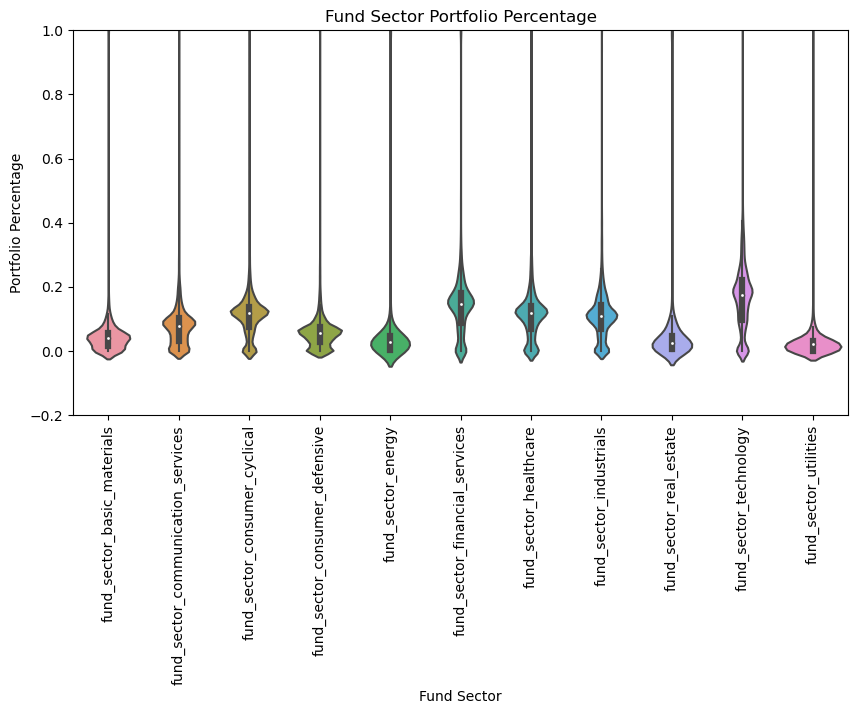

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(-.2, 1)

Plot = sns.violinplot( data=df1, font = 2, height=8.27, aspect=11.7/8.27)
for item in Plot.get_xticklabels():
    item.set_rotation(90)
    
ax.set_title('Fund Sector Portfolio Percentage')

ax.yaxis.grid(False)
ax.set_xlabel('Fund Sector')
ax.set_ylabel('Portfolio Percentage')

plt.show()

# Investment in the energy sector comprises the most even range of portfolio percentage 
# The technology fund sector has the greatest minimum investment percentage 
# Consumer defensive and healthcare might be bimodal distribution?

In [ ]:

df["mean"] = df[['fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities']].mean(axis=1)
df["std"] = df[['fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive', 'fund_sector_energy','fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_sector_technology','fund_sector_utilities']].std(axis=1)


In [ ]:
df2 = df[['mean','std']]
df2.head()

,mean,std
0,0.090909,0.111754
1,0.090909,0.288387
2,0.090900,0.055245
3,0.090909,0.109188
4,0.090900,0.055245


<AxesSubplot:ylabel='Frequency'>

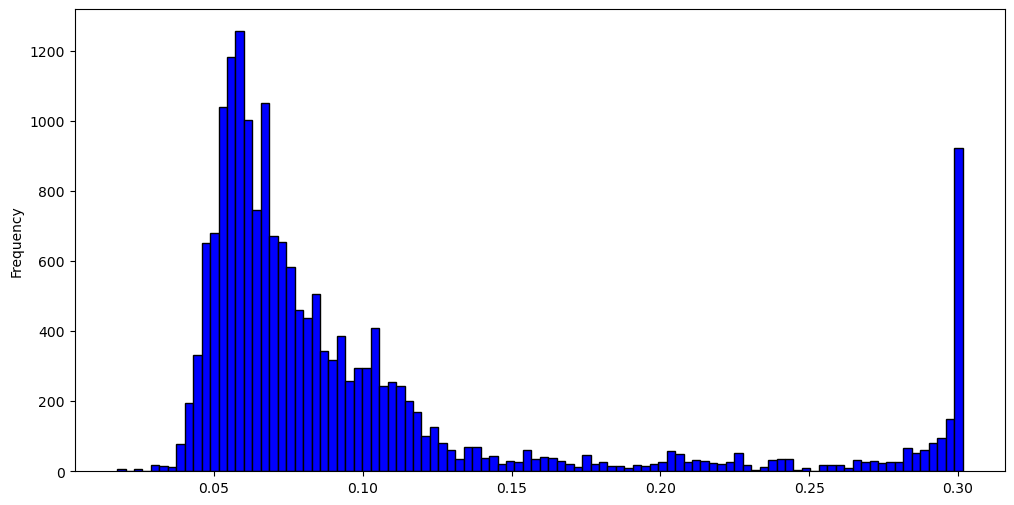

In [ ]:
df2['std'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='blue',edgecolor='black')

# Distribution of the standard deviation of fund sector investment by funds, can further narrow this down to be representative of number of sectors a company is invested to aquire more accurate information.

Text(0, 0.5, 'Year to Date Return')

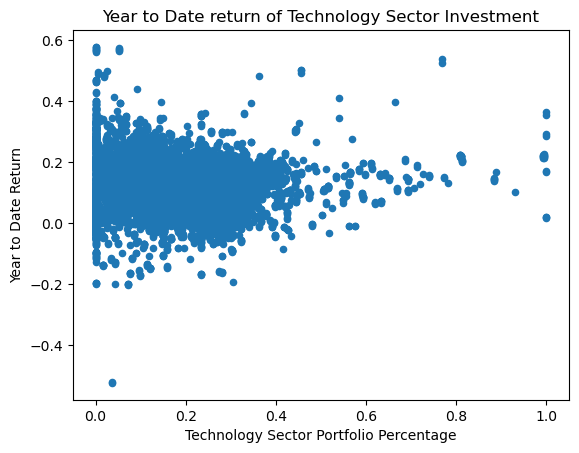

In [ ]:
df.plot(kind='scatter', x='fund_sector_technology', y='fund_return_ytd')
plt.title("Year to Date return of Technology Sector Investment")
plt.xlabel("Technology Sector Portfolio Percentage")
plt.ylabel("Year to Date Return")

# Examine this type of relationship potentially on a log scale to get a clearer data picture. Potentially will need to weed out funds with zero invesment in the sector.


### Analysis Pipeline

In [3]:
import sys
sys.path.append('C:\\Users\\adamv\\Documents\\mgmt301\\Project\\project-group-group-57\\analysis\\code')

from project_functions_AdamGoebel import load_and_process
df = load_and_process()
df

,fund_symbol,fund_long_name,fund_sector_basic_materials,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,...,fund_sector_utilities,Standard_Deviation,Mean,fund_return_ytd,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_sector_differentiation
0,AAAAX,DWS RREEF Real Assets Fund - Class A,0.1607,0.0088,0.0190,0.0293,0.1852,0.0000,0.0000,0.1413,...,0.1025,0.111754,0.090909,0.21026,0.00077,0.03920,0.22970,0.13811,0.09078,Low
3,AAAGX,Thrivent Large Cap Growth Fund Class A,0.0000,0.1617,0.1957,0.0046,0.0000,0.1458,0.1326,0.0346,...,0.0000,0.109188,0.090909,0.24559,0.03698,0.04608,0.30705,0.31791,0.19264,Low
5,AAAIX,American Century Strategic Allocation: Aggress...,0.0379,0.0709,0.1316,0.0736,0.0263,0.1357,0.1299,0.1274,...,0.0246,0.053645,0.090900,0.15050,0.00434,0.01537,0.19515,0.17981,0.11902,High
10,AAANX,Horizon Active Asset Allocation Fund Investor ...,0.0372,0.0850,0.1104,0.0756,0.0371,0.1609,0.1117,0.1089,...,0.0616,0.050152,0.090909,0.20491,0.02203,0.03150,0.24963,0.16541,0.11116,High
12,AAAPX,DWS RREEF Real Assets Fund - Class C,0.1607,0.0088,0.0190,0.0293,0.1852,0.0000,0.0000,0.1413,...,0.1025,0.111754,0.090909,0.20256,0.00078,0.03793,0.22192,0.12995,0.08282,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23754,YASSX,Fidelity Advisor Strategic Real Return Fund Cl...,0.0897,0.0442,0.0952,0.2045,0.1307,0.0740,0.0112,0.3024,...,0.0033,0.092797,0.090918,0.21800,-0.02190,0.02840,0.58190,0.10650,0.12670,Moderate
23755,YCGEX,Fidelity Series Commodity Strategy Fund,0.0000,0.0820,0.1462,0.1592,0.0000,0.3899,0.0000,0.0674,...,0.0000,0.114583,0.090900,0.20830,0.04630,0.08840,0.44530,0.21730,0.16270,Low
23762,ZDIVX,Fidelity Advisor Freedom 2035 Fund Class C,0.0520,0.0484,0.0487,0.1486,0.0718,0.2517,0.1428,0.0706,...,0.0263,0.066792,0.090909,0.15450,0.00290,0.01090,0.29190,0.10060,0.09910,Moderate
23772,ZSCCX,Fidelity Flex Small Cap Fund,0.0557,0.0036,0.0915,0.0270,0.0283,0.1983,0.1166,0.3466,...,0.0173,0.102016,0.090909,0.23030,0.00520,0.01310,0.51230,0.06530,0.09030,Moderate


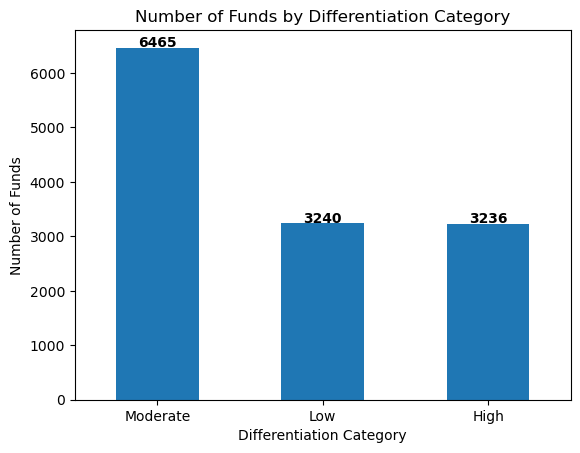

In [6]:
counts = df['fund_sector_differentiation'].value_counts()
fig, ax = plt.subplots()
counts.plot(kind='bar', rot=0)
plt.title('Number of Funds by Differentiation Category')
plt.xlabel('Differentiation Category')
plt.ylabel('Number of Funds')

for i, v in enumerate(counts):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.show()

## Fig 1. The Number of Funds seperated by Moderate, Low, and High.

#  The majority of funds sampled have a moderate differentiation of fund invesment. 

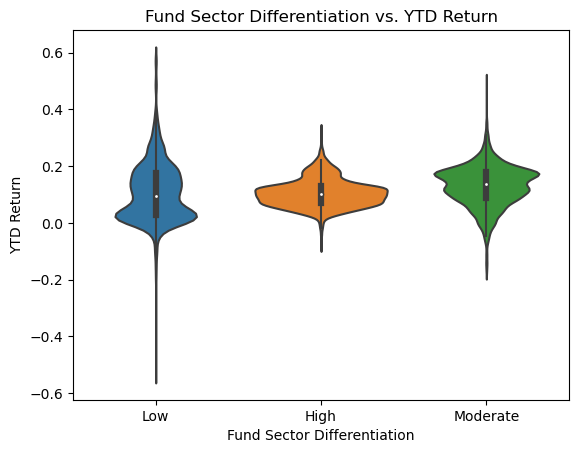

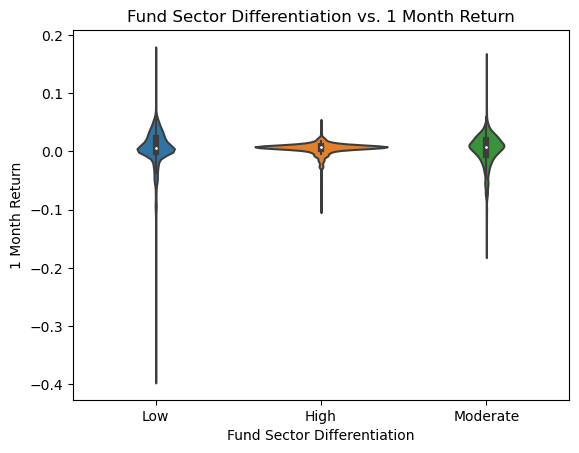

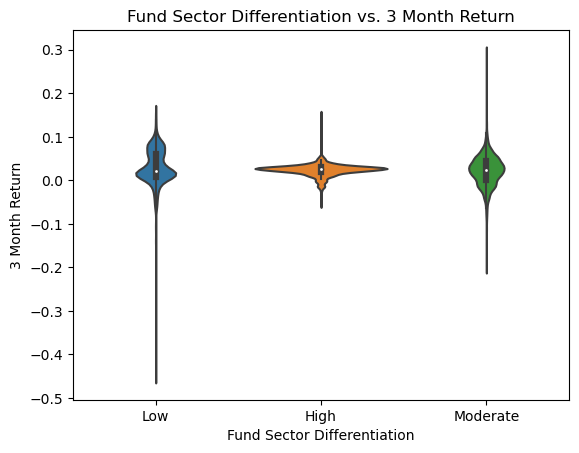

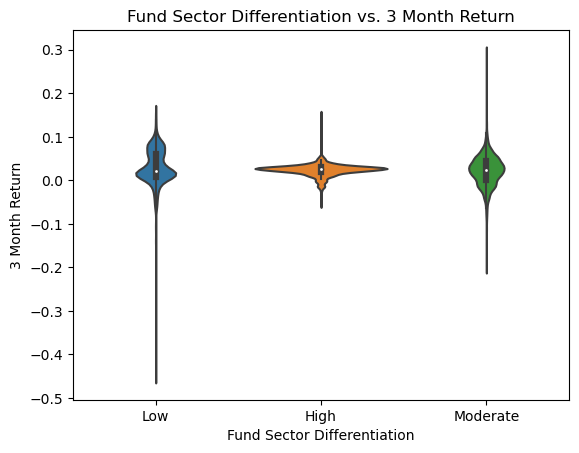

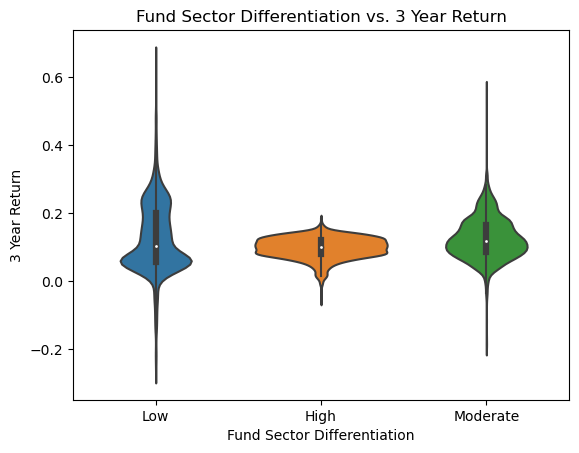

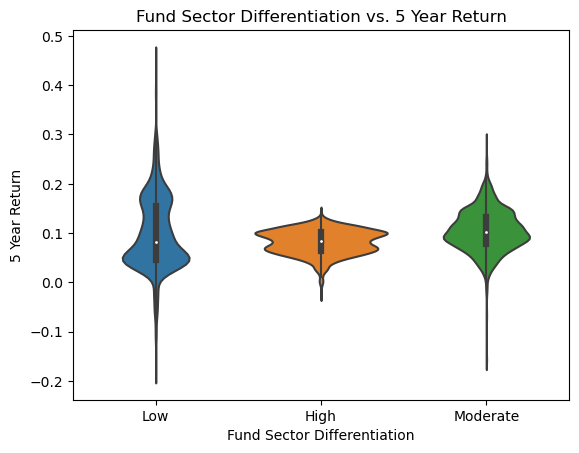

In [12]:
sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_ytd'])
plt.title('Fund Sector Differentiation vs. YTD Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('YTD Return')
plt.show()

sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_1month'])
plt.title('Fund Sector Differentiation vs. 1 Month Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('1 Month Return')
plt.show()

sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_3months'])
plt.title('Fund Sector Differentiation vs. 3 Month Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('3 Month Return')
plt.show()

sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_3months'])
plt.title('Fund Sector Differentiation vs. 3 Month Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('3 Month Return')
plt.show()

sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_3years'])
plt.title('Fund Sector Differentiation vs. 3 Year Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('3 Year Return')
plt.show()

sns.violinplot(x=df['fund_sector_differentiation'], y=df['fund_return_5years'])
plt.title('Fund Sector Differentiation vs. 5 Year Return')
plt.xlabel('Fund Sector Differentiation')
plt.ylabel('5 Year Return')
plt.show()

## Fig 2. Violin Plots displaying the distribution of Low, High, and, Moderate differentiated funds compared to fund returns at various points in time.

# All types of fund sector differentiation show that fund return at various time intervals is on average positive. Funds with high differentiation have the least amount of spread of return at each time interval.

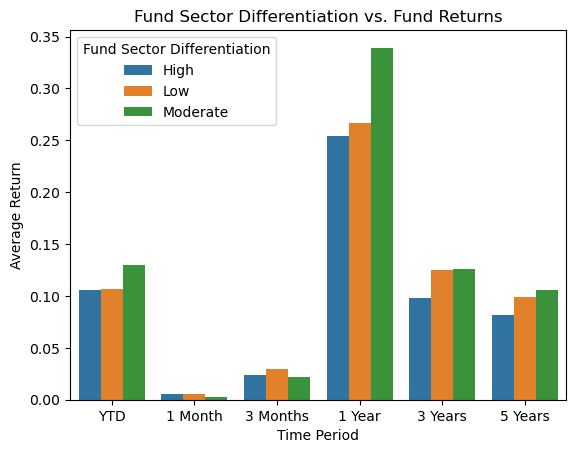

In [7]:
grouped_data = df.groupby('fund_sector_differentiation')[['fund_return_ytd', 'fund_return_1month', 'fund_return_3months', 'fund_return_1year', 'fund_return_3years', 'fund_return_5years']].mean()
grouped_data = grouped_data.reset_index()
melted_data = pd.melt(grouped_data, id_vars=['fund_sector_differentiation'], value_vars=['fund_return_ytd', 'fund_return_1month', 'fund_return_3months', 'fund_return_1year', 'fund_return_3years', 'fund_return_5years'], var_name='time_period', value_name='average_return')
ax = sns.barplot(x='time_period', y='average_return', hue='fund_sector_differentiation', data=melted_data)
ax.set_xlabel('Time Period')
ax.set_ylabel('Average Return')
ax.set_title('Fund Sector Differentiation vs. Fund Returns')
plt.legend(title='Fund Sector Differentiation')
new_labels = ['YTD', '1 Month', '3 Months', '1 Year', '3 Years', '5 Years']
plt.xticks(range(len(new_labels)), new_labels)
plt.show()


## Fig 3. Fund Sector differentiation compared to average fund return at various time intervals. 

# Fund returns at 1 Year are notably the highest out of any of the other time intervals. It is nearly consistant that Funds with moderate sector differentiation do better than funds with low or high funds sector differentiation. Surprisingly Low fund sector differntiation on average has higher returns at all time intervals than funds with high differentiation.

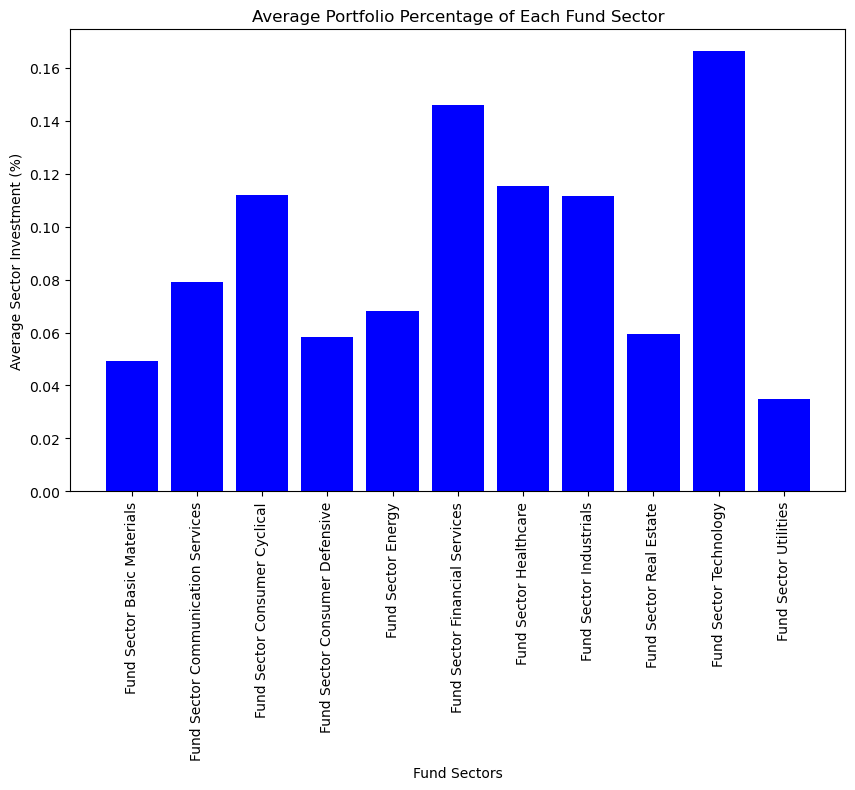

In [15]:
fund_sectors = ['fund_sector_basic_materials', 'fund_sector_communication_services',
                'fund_sector_consumer_cyclical', 'fund_sector_consumer_defensive',
                'fund_sector_energy', 'fund_sector_financial_services', 'fund_sector_healthcare',
                'fund_sector_industrials', 'fund_sector_real_estate', 'fund_sector_technology',
                'fund_sector_utilities']
sector_means = df[fund_sectors].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([sector.replace('_', ' ').title() for sector in sector_means.index], 
       sector_means.values, color='blue')
ax.set_xlabel('Fund Sectors')
ax.set_ylabel('Average Sector Investment (%)')
ax.set_title('Average Portfolio Percentage of Each Fund Sector')
plt.xticks(rotation=90)
plt.show()

## Fig 4. Average Investment into each Fund Sector by each fund.

# Unsurprisingly technology has the highest portfolio percentage of all fund sectors given the incredible growth of the industry over the past decade.

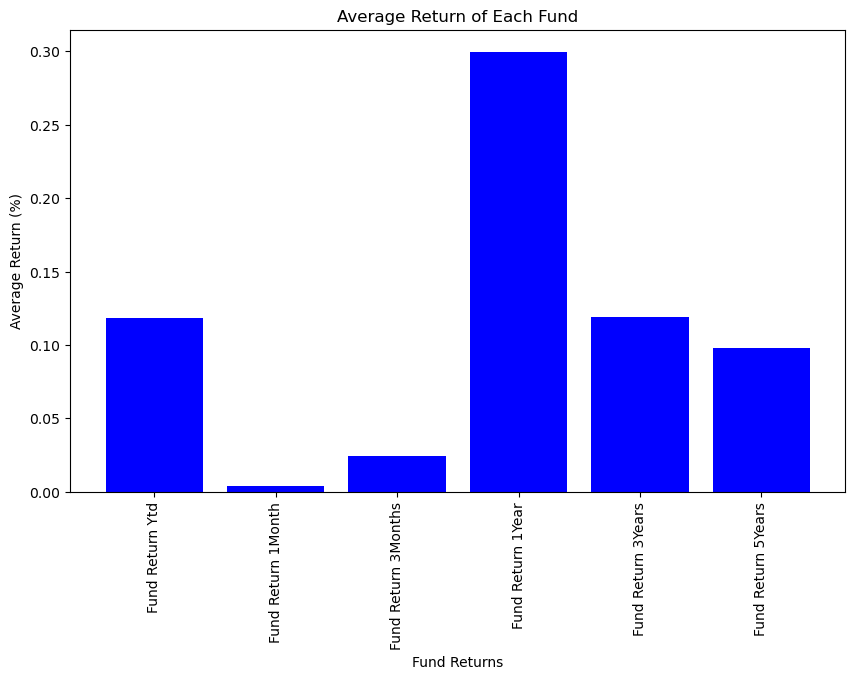

In [14]:
fund_returns = ['fund_return_ytd', 'fund_return_1month', 'fund_return_3months',
                'fund_return_1year', 'fund_return_3years', 'fund_return_5years']
return_means = df[fund_returns].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([fund.replace('_', ' ').title() for fund in return_means.index], 
       return_means.values, color='blue')
ax.set_xlabel('Fund Returns')
ax.set_ylabel('Average Return (%)')
ax.set_title('Average Return of Each Fund')
plt.xticks(rotation=90)
plt.show()

## Fig 5. Average return of each fund at specific time intervals.

# As noted under figure 3 return for funds after 1 year tower over the returns for other time intervals. This could potentially be due to covid, More analysis would be needed to confirm that assertation.

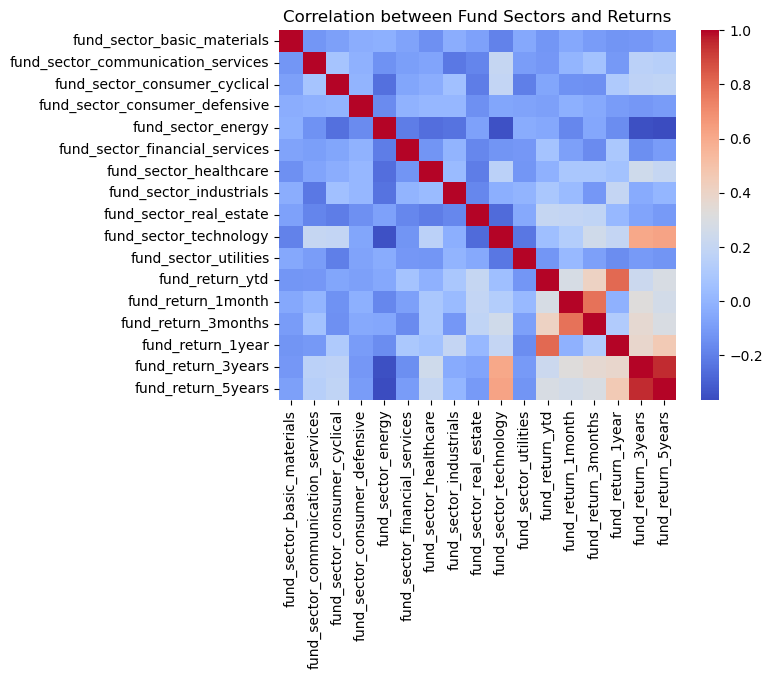

In [11]:
correlation = df[['fund_sector_basic_materials', 'fund_sector_communication_services',
             'fund_sector_consumer_cyclical', 'fund_sector_consumer_defensive', 'fund_sector_energy',
             'fund_sector_financial_services', 'fund_sector_healthcare', 'fund_sector_industrials',
             'fund_sector_real_estate', 'fund_sector_technology', 'fund_sector_utilities',
             'fund_return_ytd', 'fund_return_1month', 'fund_return_3months', 'fund_return_1year',
             'fund_return_3years', 'fund_return_5years']]
corr = correlation.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation between Fund Sectors and Returns')
plt.show()

## Fig 6. A heatmap showing correlation between Fund Sector investment and Fund returns at various time intervals.

# Investment in one fund sector does not appear to correlate with increased returns. Notably there is a correlation in the three and five year return categories and investment in the technology fund sector. This could be in part due to the boom of some technology companies due to the COVID 19 Pandemic, would need more analysis to confirm that assertation.